# Summarizing & Visualizing Financial Data

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Summarizing data with descriptive stats

## Goal
To capture key quantitative characterstics from the data.

## What to look at ?

*  Central Tendency: Which values are typical ?
*  Dispersion: Are there any outliers ?
*  Overall distribution of individual variables

## Central Tendency

*  Mean (average)
*  Median: 50% of values smaller/ larger
*  Mode: Most frequent value

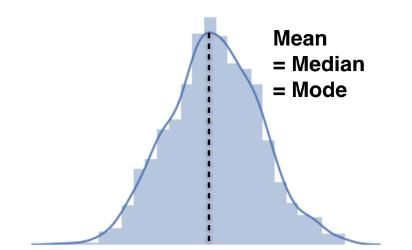

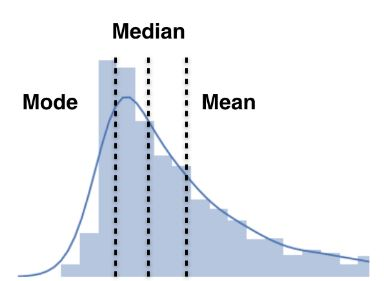

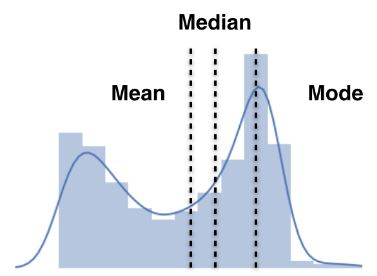

###Importing the dataset

In [2]:
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

In [3]:
market_cap = nasdaq['Market Capitalization'].div(1e6)

### Calculating summary statistics

In [4]:
#Mean
market_cap.mean()

3180.7126214953823

In [5]:
#Median
market_cap.median()

225.9684285

In [6]:
#Mode
market_cap.mode()

0    0.0
dtype: float64

## Dispersion

* Variance: Sum all of the squared differences from mean and divide by `(n - 1)`.

* Standard Deviation: Square root of variance.

### Calculating variance & standard deviation

In [7]:
# Variance
variance = market_cap.var()
variance

648773812.8182563

In [8]:
#One way to calculate standard deviation: Just finding the square root of variance.
np.sqrt(variance)

25471.038707093518

In [9]:
# Standard Deviation
market_cap.std()

25471.038707093518

## Distibution of Data

Describing the distribution of data with quantiles

### Quantiles

Quantiles: Groups with equal share of observations.

*  Quartiles: 4 Groups, 25% of data each
*  Decile: 10 Groups, 10% of data each
*  Interquartile range: 3rd quartile - 1st quartile

In [10]:
#Median is the 2nd Quartile
median = market_cap.quantile(0.5)
median == market_cap.median()

True

In [11]:
#Quantiles with pandas
quantiles = market_cap.quantile([0.25, 0.75])
quantiles

0.25     43.375930
0.75    969.905207
Name: Market Capitalization, dtype: float64

In [12]:
#Interquartile range:  3rd quartiles - 1st quartile
quantiles[0.75] - quantiles[0.25]

926.5292771575

In [13]:
#Deciles
deciles = np.arange(start=.1, stop=.91, step=.1)
deciles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [14]:
#Deciles
market_cap.quantile(deciles)

0.1       4.884565
0.2      26.993382
0.3      65.714547
0.4     124.320644
0.5     225.968428
0.6     402.469678
0.7     723.163197
0.8    1441.071134
0.9    3671.499558
Name: Market Capitalization, dtype: float64

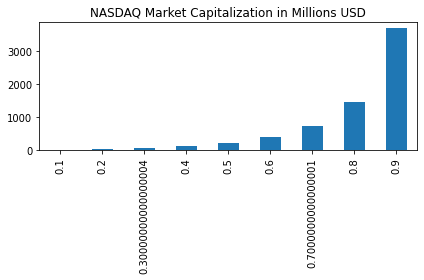

In [15]:
title = 'NASDAQ Market Capitalization in Millions USD'

market_cap.quantile(deciles).plot(kind='bar', title=title)
plt.tight_layout()
plt.show()

In [16]:
#All statistics in one go
market_cap.describe()

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
25%          43.375930
50%         225.968428
75%         969.905207
max      740024.467000
Name: Market Capitalization, dtype: float64

In [17]:
market_cap.describe(percentiles=np.arange(0.1, 0.91, 0.1))

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
10%           4.884565
20%          26.993382
30%          65.714547
40%         124.320644
50%         225.968428
60%         402.469678
70%         723.163197
80%        1441.071134
90%        3671.499558
max      740024.467000
Name: Market Capitalization, dtype: float64

##Visualizing the distribution of data

In [18]:
from pandas_datareader.data import DataReader  #Package needed to import financial data from web
from datetime import date  #Date time package

### 10-year Treasury Trend & Distibution

In [19]:
ty10 = DataReader('DGS10','fred', date(1962, 1, 1))
ty10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15403 entries, 1962-01-02 to 2021-01-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   14744 non-null  float64
dtypes: float64(1)
memory usage: 240.7 KB


In [20]:
ty10.describe()

,DGS10
count,14744.000000
mean,6.025024
std,2.954551
min,0.520000
25%,3.990000
50%,5.800000
75%,7.750000
max,15.840000


### 10-year Treasury time series trends

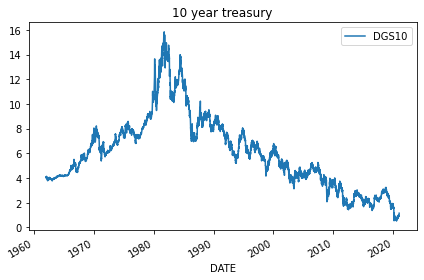

In [21]:
ty10.dropna(inplace=True)
ty10.plot(title='10 year treasury')
plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns  #Seaborn Data visualization library

### 10-year Treasury Historical distribution

`sns.distplot()` - A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


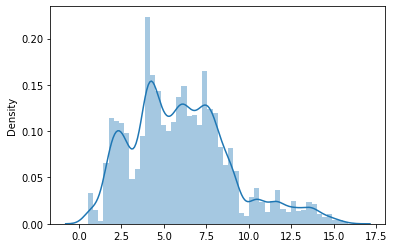

In [23]:
sns.distplot(ty10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


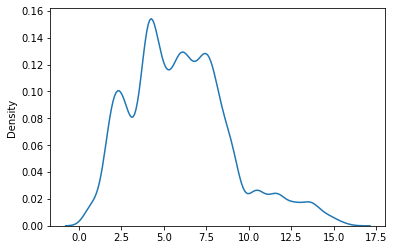

In [24]:
sns.distplot(ty10, hist=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


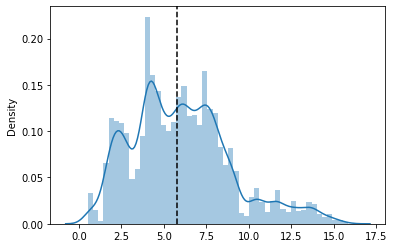

In [25]:
ax = sns.distplot(ty10)
ax.axvline(ty10['DGS10'].median(), color='black', linestyle='--')  #Adding vertical line showing median of the data
plt.show()

##Summarizing Categorical Variable

### Importing the dataset

In [26]:
amex = pd.read_excel('listings.xlsx', sheet_name='amex', na_values='n/a')
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           360 non-null    object 
 1   Company Name           360 non-null    object 
 2   Last Sale              346 non-null    float64
 3   Market Capitalization  360 non-null    float64
 4   IPO Year               105 non-null    float64
 5   Sector                 238 non-null    object 
 6   Industry               238 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.8+ KB


### How many different types of sectors ?

In [27]:
var = amex['Sector'].nunique()
var

12

### How many observations in each sector ?

In [28]:
amex['Sector'].value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

### How many IPO's per year ?

In [29]:
amex['IPO Year'].value_counts()

2002.0    19
2015.0    11
1999.0     9
1993.0     7
2014.0     6
2004.0     5
2013.0     5
2017.0     5
2003.0     5
1992.0     4
2005.0     3
2006.0     3
2016.0     3
1986.0     3
2011.0     3
2007.0     3
1997.0     2
1988.0     2
1998.0     2
2009.0     1
1991.0     1
1996.0     1
1990.0     1
1987.0     1
Name: IPO Year, dtype: int64

### Converting IPO year to `int`

In [30]:
ipo_by_year = amex['IPO Year'].dropna().astype(int).value_counts()
ipo_by_year

2002    19
2015    11
1999     9
1993     7
2014     6
2004     5
2003     5
2017     5
2013     5
1992     4
2006     3
2005     3
2007     3
2016     3
2011     3
1986     3
1998     2
1997     2
1988     2
2009     1
1996     1
1991     1
1990     1
1987     1
Name: IPO Year, dtype: int64

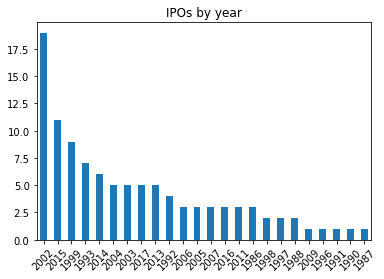

In [31]:
ipo_by_year.plot(kind='bar', title='IPOs by year')
plt.xticks(rotation=45)
plt.show()

## Conclusion

In this jupyter notebook, we have learnt How to capture key characterstics of variables in the dataset and to understand distribution of variables in the dataset.